## Goal

* **You're welcome if you are little late to the YOLO party and looking for 1-stop YOLO information for all the versions.**
 
* In this notebook, our goal is to explore the evolution of YOLO over the years and examine the differences between each version and its predecessor.

![prn_block.png](https://www.nonteek.com/wp-content/uploads/2018/06/yologo_2-300x159.png)

**Paper References**

* [You Only Look Once: Unified, Real-Time Object Detection](https://arxiv.org/abs/1506.02640)
* [YOLO9000: Better, Faster, Stronger](https://arxiv.org/abs/1612.08242)
* [YOLOv3: An Incremental Improvement](https://arxiv.org/abs/1804.02767)
* [DC-SPP-YOLO: Dense Connection and Spatial Pyramid Pooling Based YOLO for Object Detection](https://arxiv.org/abs/1903.08589)
* [YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/abs/2004.10934)
* [Scaled-YOLOv4: Scaling Cross Stage Partial Network](https://arxiv.org/abs/2011.08036)
* [YOLOv5 by Ultralytics](https://docs.ultralytics.com/yolov5/tutorials/architecture_description/#2-data-augmentation-techniques)
* [You Only Learn One Representation: Unified Network for Multiple Tasks](https://arxiv.org/abs/2105.04206)
* [YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors](https://arxiv.org/abs/2207.02696)

**Video References**

* [YOLOv1 from Scratch by Aladdin](https://www.youtube.com/watch?v=n9_XyCGr-MI)
* [GIoU vs DIoU vs CIoU Losses](https://www.youtube.com/watch?v=4wXXNQ4Ylrk&t=922s)

## [YOLO-V1](https://arxiv.org/abs/1506.02640)

* Human system is fast and accurate because it does all at once. when we look at the image, we immediately figure out where the object is located and what object it is.

* YOLO is designed to replicate this human behaviour. It does all at once which is to say it does Localization and Classification both at once using a Single Neural Network, hence the name **YOLO (You Only Look Once)**, and YOLO-V1 is the OG of the family.

* So Lets dive into the nitty-gritty of the YOLO-V1. In this section, we will discuss the followings:

    1. How YOLO-V1 sees an Image?
    2. Architecture
    3. Training
    4. Limitations of YOLO-V1
    5. Performance

### How YOLO-V1 sees an Image?

* YOLO-V1 sees an Image as a grid of size S x S. Within each grid, the model is capable of detecting B bounding boxes (objects). The authors of the paper opted for **S = 7 and B = 2**, signifying that YOLO-V1 predicts **a total of 7 x 7 x 2 =  98 bounding boxes in a single image**.

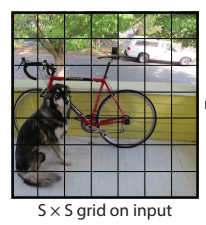

* In the above/below image, it is visible that the objects (dogs, bicycle) are in multiple Grids, we dont want a single object to be detected by the multiple grids. To address this, the grid responsible for detecting an object is the one that encompasses the center point of the object.

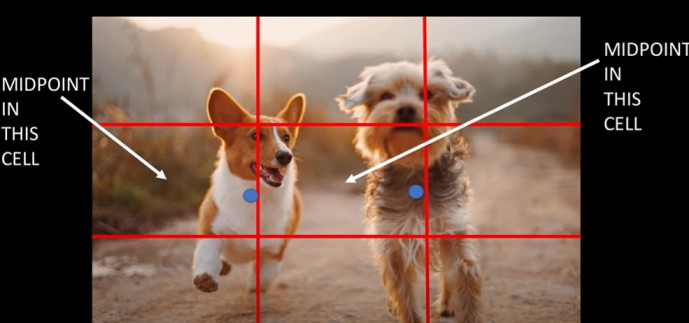

* For each Bounding Box, YOLO-V1 predicts the followings:

    * Coordinates x, y representing the center of the box relative to the bounds of the grid cell.
    * w and h representing width and height of the Bounding Box relative to the whole image.
    * a Confidence score (C) reflecting how confident the model is that the box contains an object. If no object exists in that cell, the confidence scores should be zero. Otherwise we want the confidence score to equal the intersection over union (IOU) between the predicted box and the ground truth.
    
    
* YOLO-V1 only predicts one set of class probabilities (whether it is a dog, cat, etc) **per grid cell, regardless of the number of boxes B.** The Authors have trained YOLO-V1 on PASCAL VOC Dataset which has 20 classes. In that case, each grid will predict 20 values stating probability of the classes.

* To Summarize, for each Grid YOLO-V1 will output **(B x 5) + num_classes = 2 x 5 + 20 = 30** Values. and we have a total of 7 x 7 = 49 Grids so the final output of the YOLO-V1 is a vector of the size **7 x 7 x 30**. This 5 comes from (x, y, w, h, C)

### Architecture

* YOLO-V1 architecture is inspired by GoogLeNet. It has **24 convolutional layers followed by 2 fully connected layers**.

* In the Paper, They have also trained a faster version of YOLO (Fast YOLO) with 9 Convolutional layers with fewer number of filters.

* The output of the final layer is reshaped to the S X S X (B X 5 + num_classes) representing predictions for each grids.

* The network was trained using input images of fixed size, specifically 448 x 448 pixels. Since **it is not a Fully Convolutional Network, it lacks the flexibility to accept variable-sized inputs.**

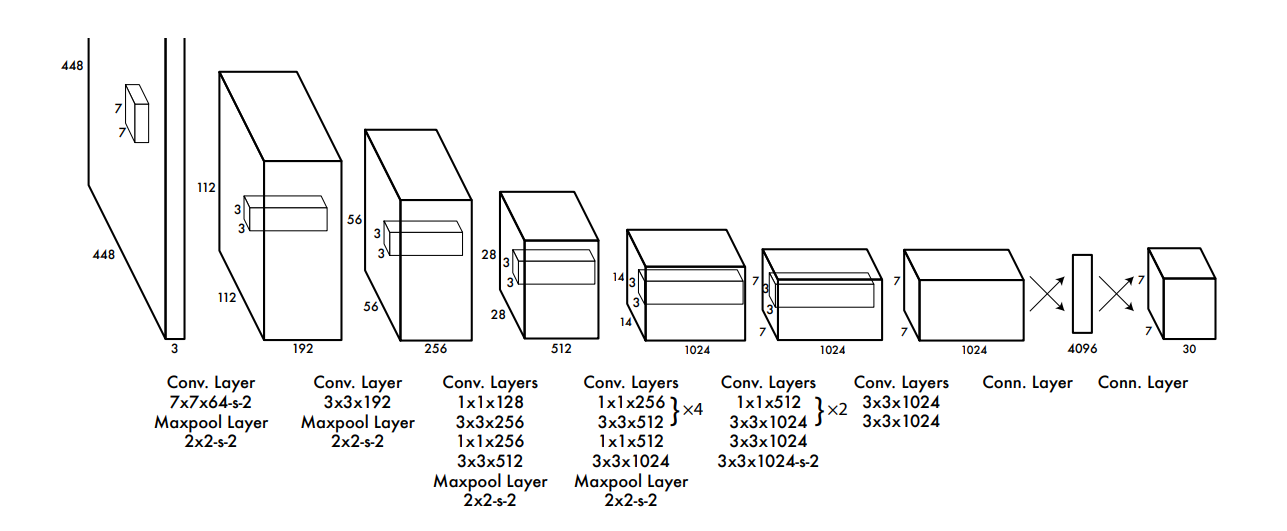


### Training

* The author pretrained the initial 20 layers of the network on the Imagenet-1000 class for classification. They have achieved a single crop top-5 accuracy of 88% on the ImageNet 2012 validation set. The pretraining was done on the images of size **224 x 224**.

* Afterward, four more convolutional layers and two fully connected layers were added for detection. The images trained for detection were sized at **448 x 448**, emphasizing the need for fine-grained visual information in detection tasks.

**Loss Funnction**

* YOLO-V1 uses a simple regression loss function (sum of squared error) for all predictions (bounding box coordinates, w, h, C, and class probability(p_c)) as shown below.

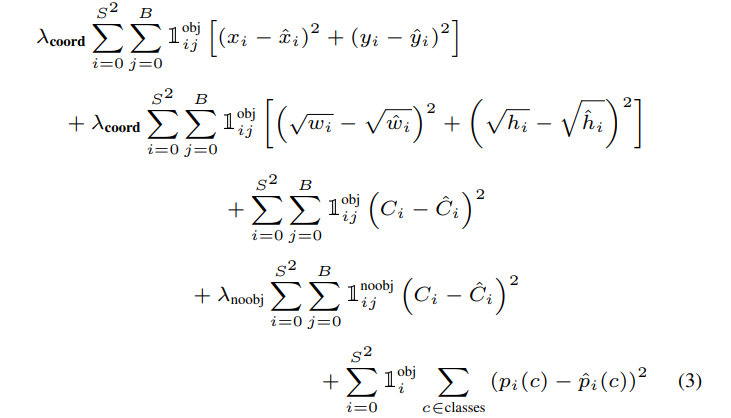

* The first term is mean squared error for center point coordinates of the Bounding Boxes (BB).
* The second term emphasizes mean squared error for w and h for BB. the squared root is taken of w and h to partially tackle the fact that small deviations in large boxes matter less than in small boxes.
* The third and fourth terms are MSE for confidence scores of BB that do and do-not contain objects in them.
* The fifth term is MSE of class probabilities for the grids.
* Note that  the first and second terms signify localization errors, whereas the third, fourth, and fifth terms denote classification errors. It is suboptimal to assign equal weights to these terms, as doing so might result in localization errors, given that localization is a more challenging task compared to classification. Therefore, the author employs distinct weights (lamda_coord and lamda_noobj) for these terms. 


### Limitations of YOLO-V1

* Since each grid can predict only two bounding boxes and has one class, It struggles to detect small nearby objects such as flock of birds.

* The loss function treats errors the same in small bounding boxes versus large bounding boxes. A small error in a large box is generally benign but a small error in a small box has a much greater effect on IOU. (can there be better loss function?)

* As stated above, it is not a Fully Convolutional Network, it lacks the flexibility to accept variable-sized inputs.

*  it struggles to generalize to objects in new or unusual aspect ratios or configurations. 

* The authors have stated their main source of error is localization.

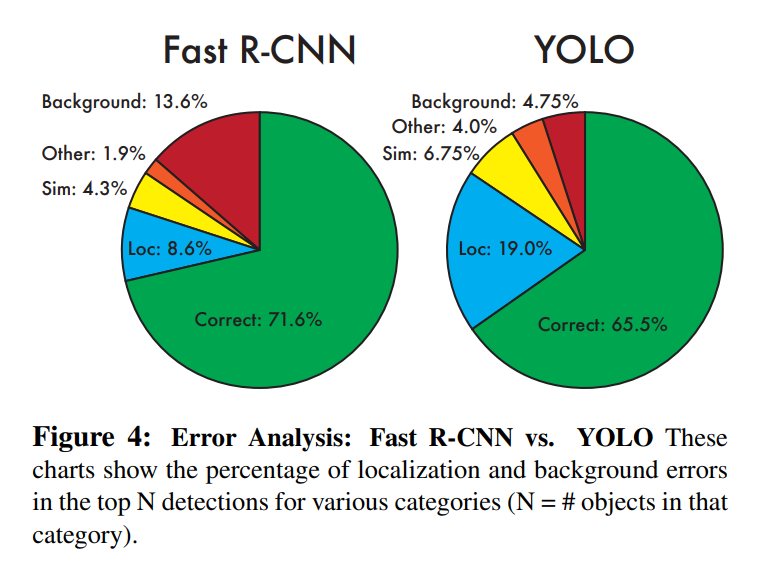

### Performance

|   Model   |   Training Data   |   mAP   |   FPS   |
|-------|-------|-------|-------|
|  YOLO-V1  |  PASCAL VOC 2007 + 2012  |  63.4  |  45  |
|  Fast YOLO-V1  |  PASCAL VOC 2007 + 2012 |  52.7  |  **155**  |
|  YOLOV1-VGG  |  PASCAL VOC 2007 + 2012  |  **66.4**  |  21  |


## [YOLO-V2](https://arxiv.org/abs/1612.08242)

* YOLO-v2 was developed as an evolution of YOLO-v1, taking into consideration the limitations and shortcomings of the first version.

* The YOLO-V1 has main issue of localization and other smaller issues as small/nearby object detection and input size rigidity. Also it was even though faster, but wasn't state of the art in terms of the performance.

* In YOLO-V2, the authors have incorporated several tricks to handle these issues and enhance the model's detection performance.

* In this section, we will discuss how YOLO-V2 differs from V1.

    1. Design
    2. Architecture
    3. Training
    4. Performance

### Design

* YOLO-V2 is designed to detect a total of 13 x 13 x 5 = 845 bounding boxes as compared to 7 x 7 x 2 = 98 in YOLO-V1.

* YOLO-V2 can detect 5 bounding boxes per grid cell, and assign class probabilities to each of them, unlike one class probability per grid cell in YOLO-V1. This allows it to detect nearby objects better than the V1.

* In YOLO-V1, Bounding boxes are predicted directly from the output of the final layer. There were no prior assumptions on the bounding boxes. In YOLO-V2, the author uses the concept of **anchor boxes** for bounding box predictions.

**What are anchor boxes?**

* The Anchor boxes is like **choosing some boxes (5 in YOLO-V2) with predefined sizes and now you let the model adjust these boxes to fit the target objects**. It is useful because **YOLO can learn small adjustments better/easier than large ones**.

* Choosing Good Priors for anchor boxes are very important and it is intuitive to choose the anchor boxes that represents your training data.

* In the paper, they run the k-means clustering on the sizes of the bounding boxes to get the good priors for the anchor boxes. from their analysis they have figured out k = 5 provides good balance between the IOU and model complexity hence they chose k = 5.

* YOLO-V2 predicts width and height of the bounding boxes as offsets from the cluster centroids (anchor boxes). The center points (x, y) are predicted relative to the grid only.

* Each bounding box predicts 5 coordinates (t_x, t_y, t_w, t_h, t_o) and 20 class probabilties (PASCAL-VOC). t_o is the objectness score here. In total the output size of the model is **13 x 13 x (B x (5 + 20)) = 13 X 13 X 125.**

In below figure, the dotted is the anchor box, and solid blue is the predicted Bounding Box (BB). This diagram shows that midpoint of the BB (t_x and t_y) are predicted w.r.t grid and height and width (t_w and t_h) are predicted relative to the anchor box's height and width.

![Anchor boxes](https://miro.medium.com/v2/resize:fit:1134/1*p7F0dA9pVoZndxuFNuvOHg.jpeg)

### Architecture

* YOLO-V2 uses model input size as 416 x 416 as compared to the 448 x 448 in YOLO-V1.

* In YOLO-V1, they have used GoogleNet like architecture consists of 24 Conv and 2 FC Layers, In YOLO-V2, the author has introduced the **Darknet-19, that has less number of parameters and better accuracy on the ImageNet classification** than the model used in the V1. This is the main reason YOLO-V2 is faster than V1. The architecture of the Darknet-19 for Image Classification is shown below.


![Darknet](https://media.geeksforgeeks.org/wp-content/uploads/20200327225305/darknet-19-YOLOv2.png)

* This network is modified for detection by removing the last convolutional layer and instead adding on three 3 × 3 convolutional layers with 1024 filters each followed by a final 1 × 1 convolutional layer with the number of outputs (125) we need for detection.

* They have also used the output from one earlier layer a.k.a Fine-grained features (the one with size 26 x 26 x 512) and reshaped it to 13 x 13 x 2048 and then concatenated with the final layer output (13 x 13 x 1024). After doing this the output size of the feature map will be 13 x 13 x (1024 + 2048) --> 13 x 13 x 3072 on which then they apply 1 x 1 x 125 conv filter to obtain the final output of the size 13 x 13 x 125.

![yolov2.png](https://www.researchgate.net/publication/330029907/figure/fig2/AS:1086434010247206@1636037461620/The-network-architecture-of-YOLOv2.jpg)

### Training

* In YOLO-V1 they trained the classifier network at 224 × 224 and increases the resolution to 448 for detection. This means the network has simultaneously switch to learning object detection and adjust to the new input resolution.

* To address this issue in YOLO-V2, the approach involves initially training the classifier network with an input size of 224 x 224. Subsequently, the network undergoes **fine-tuning for 10 epochs on Imagenet classification task, but this time with an input size of 448 x 448**. Ultimately, the fine-tuned network serves as the backbone for the detection task, operating on an input size of 416 x 416.

* Implementing this training strategy resulted in an approximately **4% increase in mean Average Precision (mAP) compared to YOLO-V1**.

* Batch Normalization was not used in YOLO-V1. (Don't be surprised :D, YOLO-V1 and Batch Normalization both papers were published in 2015). YOLO-V2 uses Batch Normalization. By adding Batch Normalization provided ~2% boost in mAP.

**Multi-Scale Training**

* YOLO-V1 was trained on the fixed input image size of 448 x 448.

* During YOLO-V2 Training, Every 10 batches the network randomly chooses a new image dimension size. Since YOLO-V2 model downsamples by a factor of 32, it pull from the following multiples of 32: {320, 352, ..., 608}. Thus the smallest option is 320 × 320 and the largest is 608 × 608. This allows **YOLOv2 to be robust to running on images of different sizes.**

**Loss Function**

* since YOLO-V2 predicts one set of class probability per bounding box unlike one set per grid in YOLO-V1. To handle this, they have modified the YOLO-V1 loss. The original paper didnt mention anything about the new loss. But [here](https://fairyonice.github.io/Part_4_Object_Detection_with_Yolo_using_VOC_2012_data_loss.html) is the loss function for YOLO-V2. Don't get afraid by looking at this :p. its basically similar to YOLO-V1 except class probability loss term (loss<sup>p</sup>).

![yolov2 loss](https://farm8.staticflickr.com/7904/45592720625_821897e898_b.jpg)

### Performance

* The Journey of YOLO-V2 from YOLO-V1 is best described through this figure.

![YOLO V2 from V1](https://miro.medium.com/v2/resize:fit:1214/1*TVHW23NLnqWXKfDu9QNbcw.png)

* Performance Table for YOLO-V2 in Comparison to V1.

|   Model   |  Image Size  |  Training Data   |   mAP   |   FPS   |
|-------|-------|------|-------|-------|
|  YOLO-V1  | 448 x 448  | PASCAL VOC 2007 + 2012  |  63.4  |  45  |
|  **YOLO-V2**  | 416 x 416  | PASCAL VOC 2007 + 2012 | 76.8 | **67**  |
|  **YOLO-V2**  | 544 x 544  | PASCAL VOC 2007 + 2012  | 78.6  | 40  |

## [YOLO-V3](https://arxiv.org/abs/1804.02767)

* **New Dataset:** V1 and V2 focuses on improving the detection performance of PASCAL VOC dataset that has 20 classes. In YOLO-V3, the focus has shifted to **COCO** dataset that has 80 classes and hence comparatively more difficult task. 

* **New Metric:** In V1 and V2, The evaluation metric is **AP<sub>50</sub>** which is basically Average Precision on a specific IOU Threshold of 50%. The COCO dataset uses the metric **AP which calculates the average precision across multiple IoU thresholds.** The IoU thresholds typically range from 0.5 to 0.95, with steps such as 0.05. So In YOLO-V3 and onwards, the focus will be on improving **AP** which is more complex metric than AP<sub>50</sub>.

As we can see in the below table, For COCO Dataset, **AP<sub>50</sub>** is still decent but **AP** is not quite impressive for **YOLO-V2**. Hence YOLO-V3 will focus on improving **AP**.

|   Model   | Backbone |   Dataset   |   AP   |   AP<sub>50</sub>   | AP<sub>75</sub> 
|-------|-------|------|-------|-------|-------|
|  YOLO-V2  | Darknet-19  | COCO  |  21.6  |  44  |  19.2 |


In this section, we will discuss how YOLO-V3 differs from V2.

**Anchor boxes:** 

* YOLO-V3 uses a total of **9 anchor boxes divided equally at 3 different scales** compare to 5 anchor boxes at 1 scale in YOLO-V2.

* YOLO-V2 generates a single output with dimensions 13 x 13 x 125 (noting the scale as 13 x 13). In contrast, **YOLO-V3 yields three distinct outputs, each corresponding to different scales: 13 x 13, 26 x 26, and 52 x 52.**

* The 13 x 13 layer is responsible for detecting large objects, while the 52 x 52 layer detects smaller objects and the 26 x 26 layer detects medium-sized objects.

* The Output sizes of YOLO-V3 are: 13 x 13 x (3 x (5 + 80)), 26 x 26 x (3 x (5 + 80)), and 52 x 52 x (3 x (5 + 80)). 3 corresponds to number of bounding boxes, 5 corresponds to (x, y, w, h, C) and 80 corresponds to num of classes in COCO.

* YOLO-V3 can predict a total of **3 * (13x13 + 26x26 + 52x52) = 10647** bounding boxes compared to 5*(13x13) = 845 in YOLO-V2.

**Architecture:**

* YOLO-V3 uses **Darknet-53 with Residual Connections** which has 53 Convolutional layers compared to Darknet-19 (No Residual Connections) in YOLO-V2. 


<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-24_at_12.53.56_PM_QQoF5AO.png" width="300" height="200">


* YOLO-V3 has 3 outputs at 3 different scales, The previous scale is utilized to calculate the output at each scale as approximately explained below:

**Output at scale 13 X 13**: You run the input through the complete Darknet-53 backbone, it will output 13 x 13 x 1024 dimension vector. Apply few more conv layers and a final layer with kernel size 1 and filter size with 3 x (5 + 80) = 255  to yield the output at first scale of size 13 x 13 x 255.

**Output at scale 26 X 26**: Take the output 13 x 13 x 1024 yielded in previous step, run through a conv layer and upsample the feature map to 26 x 26, finally concat this feature map with the feature map of 26 x 26 in the backbone. Apply few more conv layers and a final layer with kernel size 1 and filter size with 3 x (5 + 80) = 255 to yield the output at second scale of size 26 x 26 x 255.

Similar transition is followed to yield the output at 3rd scale. The archiecture diagram is shown below.

![YOLO-V3](https://images.squarespace-cdn.com/content/v1/61768966fe59840b508e5319/bfe03d09-a2ec-48f3-aca5-d25f11a9bd00/Group+17+%281%29.jpg?format=1500w)


**Training:**

* YOLO-V3 uses similar training strategy as YOLO-V2.

**Performance:**

|   Model   | Image Size | Backbone |   Dataset   |   AP   |   AP<sub>50</sub>   | AP<sub>75</sub> | FPS
|-------|-------|------|-------|-------|-------|------|------|
|  YOLO-V2  | 416 X 416 | Darknet-19  | COCO  |  21.6  |  44  |  19.2 | **67**
|  **YOLO-V3**  | 416 X 416 | Darknet-53  | COCO  |  **31** |  55.3  |  NA | 35
|  **YOLO-V3**  | 608 X 608 | Darknet-53  | COCO  |  **33** |  57.9  |  34.4 | 20

* AP has significantly increased but the network has become ~3.5x slower.

## [YOLO-SPP](https://arxiv.org/ftp/arxiv/papers/1903/1903.08589.pdf)

* This paper (not from the original YOLO Authors) introduced the **Spatial Pooling Layer (SPP)** to YOLO, a concept that became well-known and was widely adopted in later versions of the YOLO model.

* In both YOLO-V2 and YOLO-V3, Detection performance was enhanced by combining features from multiple scales through concatenation.

* However The multi-scale prediction of YOLOv2 and YOLOv3 focuses on concatenating the global features of multi-scale convolutional layers while ignores the fusion of multi-scale local region features on the same convolutional layer.

* SPP block was designed and introduced for **pooling and concatenating the multi-scale local region features in the same convolutional layer**.

* This paper demonstrated that incorporating the SPP (Spatial Pyramid Pooling) block enhances detection performance with only a marginal increase in processing time.


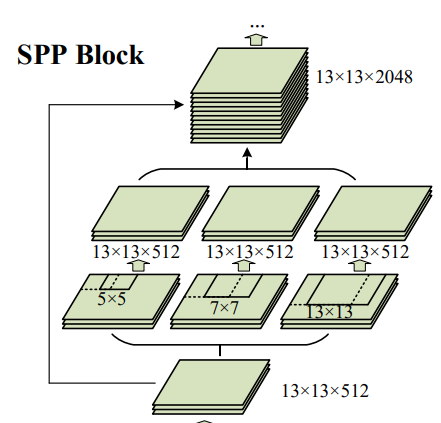

* Using SPP Block with YOLO-V3 improved the detection performance by ~3% at the cost of 0.5% extra computation

|   Model   | Image Size | Backbone |   Dataset   |   AP   |   AP<sub>50</sub>   | AP<sub>75</sub> | FPS
|-------|-------|------|-------|-------|-------|------|------|
|  YOLO-V3  | 608 X 608 | Darknet-53  | COCO  |  **33** |  57.9  |  34.4 | 20
|  **YOLO-V3 + SPP**  | 608 X 608 | Darknet-53  | COCO  |  **36.2** |  60.6  |  38.2 | 20

## [YOLO-V4](https://arxiv.org/abs/2004.10934)

* YOLO-V4 is the first YOLO paper which is not authored by Joseph Redmon and Ali Farhadi. YOLO-V4 aims to enhance both **accuracy and speed** compared to its predecessor, YOLO-V3.

* YOLO-V4 paper introduced two terms namely **Bag of freebies** and **Bag of Specials.** Let's first understand these terms.

**Bag of Freebies (BoF):** BoF are training methods/strategies that we incorporate during training that may increase the training cost but results in a better object detector performance (accuracy). Note that BoF doesn't affect the inference cost. For ex: Data Augmentation is a BoF.

**Bag of Specials (BoS):** BoS are plugin modules or post-processing methods that increase the inference cost by small amount but significantly improves the model performance. For ex: SPP Block is a BoS.

**YOLO-V4 leverages a range of Bag of Freebies (BoF) and Bag of Specials (BoS) techniques to enhance object detection performance without significantly impacting inference speed.**

As mentioned above, YOLO-V4 improves speed and accuracy over V3 using following tricks.

**Speed:**

* YOLO-V3 attains an Average Precision (AP) of 33 with an image size of 608 x 608. YOLO-V4 aims for improving the detection performance with the image size of **512 x 512**. This reduction in image size leads to a decrease in computation cost, resulting in enhanced speed.

* YOLO-V4 replaces the Darknet53 backbone (used in YOLO-V3) with **CSPDarknet-53**. According to the [paper](https://arxiv.org/pdf/1911.11929.pdf), introducing Cross Stage Partial (CSP) network to any architecture reduces computations by 20% with equivalent or even superior accuracy on the Classification and Detection tasks. Hence **CSPDarknet-53 is faster than Darknet-53.**

**Accuracy:**

* Bag of Freebies (BoF)
* Bag of Specials (BoS)

In this section, we will discuss the various aspects of YOLO-V4 in detail.

1. Architecture
2. Bag of Freebies
3. Bag of Specials
4. Performance

### <span style="color: green;">Architecture</span>

YOLO-V4 architecture consists of 3 Parts.

1. **Backbone**: CSPDarknet-53
2. **Neck**: SPP Block + PANet (Path Aggregation Network)
3. **Head**: YOLO-V3 head (anchor based)

* **Note**: Neck is used to combine multi-scale features in a sensible way to get better detection performance. In YOLO-V3, multi-scale features are processed and concatenated  before making 3 scales predictions. Head is basically the 3 output feature maps of size 13 x 13, 26 x 26, and 52 x 52 obtained in YOLO-V3

**CSPDarknet-53:**

* In Cross Stage Partial Network (CSPNET), the input feature map is divided into two parts. The first part is passed through any computational block (DarkNet, ResNet, etc) and the second part directly crosses the entire stage and then concatenated with the processed first part.

* Since only part of the feature map enters the computational block for operation, this kind of design can effectively reduce the amount of parameters, operation, memory traffic, and memory peak, allowing the system to achieve faster inference speed.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDuh8v2byvcKTgs73MIP_T6afvtraUQhbaXg&usqp=CAU" width="300" height="300">

* In CSPDarknet-53, the author replaces the Residual Convolutional blocks with the CSP Blocks as shown below.

<img src="https://www.researchgate.net/publication/351731859/figure/fig2/AS:1025659312816128@1621547644217/The-structure-of-CSPDarknet53-a-and-CSPDarknet53-tiny-b.ppm" width="500" height="500">

**SPP Block** is already explained in the section **YOLO-SPP.**

**PANet:**

* Path Aggregation Networks (PANet) is the extension of the neck used in YOLO-V3.

* In YOLO-V3, we take last layer output of the backbone (Darknet) and upsample it two times to get output at second and third scales (26 x 26 and 52 x 52) while the output at first scale (13 x 13) is directly obtained from output of the backbone. (Refer to YOLO-V3 Architecture in YOLO-V3 section above)

* In YOLO-V3 neck, It's important to highlight that when making predictions for a scale of 13 x 13, we do not incorporate the output from the scales of 26 x 26 and 52 x 52. Similarly, when generating predictions for the scale of 26 x 26, we do not utilize the output from the scale of 52 x 52.

* PANet is extension to YOLO-V3 neck, where the output at each scale incorporates information from all other scales.

* In YOLO-V4 neck, the process involves two upsampling steps followed by two downsampling steps (or stride = 2), as illustrated in the diagram below. In essence, this elongated path is taken to effectively aggregate information from feature maps across all three scales.


<img src="https://miro.medium.com/v2/resize:fit:1400/0*AZGFRB6kv9qmwYca.png" width="600" height="600">

### <span style="color: green;">Bag of Freebies (BoF)</span>

* **BoF-backbone**: The current norm involves initially pretraining the backbone on Imagenet for classification purposes, followed by utilizing it for detection tasks. For classifier training, the BoF's are

    1. CutMix Augmentation
    2. Mosaic Augmentation
    3. Class label smoothing
    
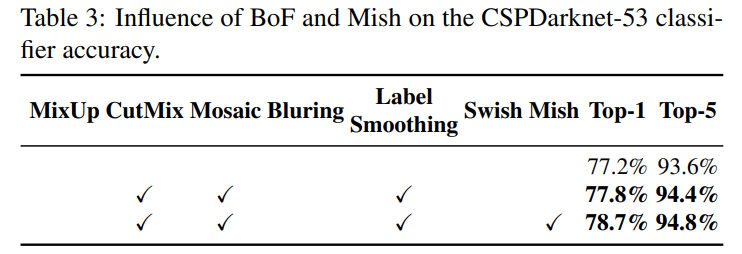


* **BoF-detector**:

    1. **Eliminate Grid Sensitivity**: This is to detect the objects whose center points are near or on the boundaries of the grids. According to the YOLO-V3 formulation, the center points are predicted w.r.t grid using these equations:

    $$
    b_x = \sigma(t_x) + c_x
    $$

    $$
    b_y = \sigma(t_y) + c_y
    $$

    Therefore, extremely high tx absolute values are required for the bx value approaching the cx or cx + 1 values. (center points near boundaries of the grids)
    
    **YOLO-V4 solve this problem by multiplying sigmoid with a value greater than 1.**

    $$
    b_x =  \alpha \cdot \sigma(t_x) + c_x - \frac{\alpha - 1}{2} 
    $$

    $$
    b_y = \alpha \cdot \sigma(t_y) + c_y - \frac{\alpha - 1}{2}
    $$
    
    $$
    \text{where } \alpha > 1
    $$
    2. **CIoU-loss:** 
    
        * Till now, we have been using MSE Loss for Bounding Boxes prediction (x, y, w, h) that is not well aligned with the IoU metric.  as it can be seen in the below diagram, Green is Ground Truth Bounding Box and Black is predicted one. They all have same L2 distance but their IOU's are quite different.

        <img src="https://giou.stanford.edu/_nuxt/img/f42a6d1.jpg" width="300" height="300">

     * Also using IoU directly as a loss function (loss = 1 - IoU) is not viable. This is because, in scenarios where there is no overlap between the Ground Truth and the Predicted Bounding Box, the IoU is zero, resulting in no gradient information (i.e., the derivative of the loss is zero).

     * To tackle this issue, [Complete IoU Loss (CIoU)](https://arxiv.org/pdf/1911.08287.pdf) is proposed, taking into account the Euclidean distance between the Ground Truth and Predicted Center points as well as the aspect ratio of the Ground Truth and Predicted Bounding Boxes along with the IoU.
     
      <img src="https://i.stack.imgur.com/cqini.png" width="600" height="600">
      
     * I would highly recommend this amazing [YouTube tutorial](https://www.youtube.com/watch?v=4wXXNQ4Ylrk&t=922s) to understand CIoU loss better.
   
    3. **Cross mini-Batch Normalization (CmBN):**
    
        * Batch Normalization demonstrates optimal performance with larger batch sizes, typically 32 or more. This is because Batch Normalization operates under the assumption that the distribution statistics computed within each mini-batch effectively represent the statistics across the entire training dataset.

        * Nevertheless, widely used GPUs like the Tesla V100 often lack sufficient RAM capacity to accommodate large batches, especially in scenarios such as Object Detection where big models are employed.

        * To handle this, [CmBN](https://arxiv.org/pdf/2002.05712.pdf) was proposed. we can use a smaller batch size (8 or 16) and still achieve fairly good performance. **CmBN gives us flexibility to train our model on Common GPU's with small size batches**.

        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNCWJ1VgoHgS8pRwFNi625mdCSkp2QC5C6MA&usqp=CAU" width="300" height="300">
    
    4. **DropBlock Regularization:**
    
        * DropBlock is a structured form of dropout directed at regularizing convolutional networks.

        * In DropBlock, units in a contiguous region of a feature map are dropped together. As DropBlock discards features in a correlated area, the networks must look elsewhere for evidence to fit the data.

        <img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-06_at_12.36.48_PM.png" width="400" height="400">
  
### <span style="color: green;">Bag of Specials (BoS)</span>

* **BoS-backbone**: BoS for classifier training are

    1. **Mish Activation**: seems to work better than ReLU, Swish, etc in YOLO-V4 experiments
    2. **Cross-Stage Partial Networks (CSP)**: explained above.
    
    
* **BoS-detector**: BoS used for detector training are

    1. **Mish Activation**: seems to work better than ReLU, Swish, etc in YOLO-V4 experiments
    2. **Spatial Pyramid Pooling (SPP)**: explained above.
    3. **Path Aggregation Networks (PAN)**: explained above.
    
### <span style="color: green;">Performance</span>

|   Model   | Image Size | Backbone |   Dataset   |   AP   |   AP<sub>50</sub>   | AP<sub>75</sub> | FPS
|-------|-------|------|-------|-------|-------|------|------|
|  YOLO-V3  | 608 X 608 | Darknet-53  | COCO  |  33 |  57.9  |  34.4 | 20
|  YOLO-V3 + SPP  | 608 X 608 | Darknet-53  | COCO  |  36.2 |  60.6  |  38.2 | 20
|  **YOLO-V4** | 512 X 512 | CSPDarknet-53  | COCO  |  **43.0** |  64.9  |  46.5 | **31**

As indicated in the table above, YOLO-V4 exhibits superior performance and speed compared to YOLO-V3.

## [YOLO-V5](https://docs.ultralytics.com/yolov5/tutorials/architecture_description/#2-data-augmentation-techniques)

**Fun Fact:** No official papers were released for YOLO-V5; instead, the authors opted to share a PyTorch implementation on GitHub. Controversies arose regarding whether the new version should be labeled as YOLO-V5 because it came out of blue and lots of interesting [back and fourth](https://github.com/AlexeyAB/darknet/issues/5920?ref=blog.roboflow.com#issuecomment-642812152) between YOLO-V4 and YOLO-V5 authors. :p 

Despite potential discrepancies in performance comparisons with YOLO-V4, I found the documentation for YOLO-V5 to be quite impressive.

In this section we will discuss the various aspects of YOLO-V5.

### <span style="color: green;">Architecture</span>

YOLO-V5 architecture consists of 3 Parts.

1. **Backbone**: CSPDarknet-53
2. **Neck**: **SPPF Block** + **CSP-PANet** (Path Aggregation Network)
3. **Head**: YOLO-V3 head (anchor based)

Note In YOLO-V5, the SPP block is replaced with the SPPF block. **SPPF** is the optimized and faster version of SPP.

<img src="https://www.researchgate.net/profile/Liang-Huang-25/publication/362193968/figure/fig6/AS:1180928915308548@1658566802997/a-SPP-structure-diagram-and-b-SPPF-structure-diagram.png" width="300" height="300">

Also it uses **CSP-PAN** as neck compared to PAN in YOLO-v4. Rest of the architecture is quite similar to V4 as shown below.

![YOLO-V5](https://user-images.githubusercontent.com/31005897/172404576-c260dcf9-76bb-4bc8-b6a9-f2d987792583.png)

### <span style="color: green;">Loss Function</span>

* YOLO-V5 also uses CIoU as localization loss.
* Binary Cross Entropy (BCE) loss is used for objectness and classes.
* YOLO-V5 assigns **distinct weightages to objectness loss** based on the size of objects, distinguishing between Large, Medium, and Small categories.

$$
\
\text{Loss} = \lambda_1 \cdot L_{\text{class}} + \lambda_2 \cdot L_{\text{obj}} + \lambda_3 \cdot L_{\text{loc}}
\
$$

$$
where 
\
L_{\text{obj}} = 4.0 \cdot L_{\text{obj}}^{\text{small}} + 1.0 \cdot L_{\text{obj}}^{\text{medium}} + 0.4 \cdot L_{\text{obj}}^{\text{large}}
\
$$

### <span style="color: green;">Performance</span>

* Documentation doesn't include any comparison with previous versions.
* However according to this [discussion](https://github.com/AlexeyAB/darknet/issues/5920?ref=blog.roboflow.com), YOLO-V5 is a bit less than the YOLO-V4 in terms of performance and speed. Not sure how true it is.

<img src="https://user-images.githubusercontent.com/4096485/85050233-75f28a80-b19e-11ea-9e24-cf8a2ea60996.png" width="300" height="300">


## [YOLO-V4-CSP](https://arxiv.org/abs/2011.08036)

* YOLO-V4-CSP (or scaled YOLO-V4) is from the same author as YOLO-V4 paper.
* This paper introduces slight modifications to the YOLO-V4 architecture to obtain YOLO-V4-CSP, followed by a scaling-up process to yield three distinct versions referred to as P5, P6, and P7.

### <span style="color: green;">Architecture</span>

since we have already discussed the architecture of YOLO-V4, we'll compare the differences between YOLO-V4 and YOLO-V4-CSP through this table.

|   Model   | Backbone | Neck |   Head  
|-------|-------|------|-------|
|  YOLO-V4  | CSPDarknet-53 | SPP + PANet  | YOLO-V3 head  |
|  **YOLO-V4 - CSP**  | CSPDarknet-53 | **CSP-SPP + CSP-PAnet**  | YOLO-V3 head  |

as name suggests, they've made everything CSP.

![YOLO-V4-csp](https://blog.roboflow.com/content/images/2020/12/image-2.png)

### <span style="color: green;">Performance</span>

|   Model   | Image Size | Backbone |   Dataset   |   AP   |   AP<sub>50</sub>   | AP<sub>75</sub> | FPS
|-------|-------|------|-------|-------|-------|------|------|
|  YOLO-V4 | 512 X 512 | CSPDarknet-53  | COCO  |  43.0 |  64.9  |  46.5 | 31
|  **YOLOV4-P5** | 896 X 896 | CSPDarknet-53  | COCO  |  **51.4** |  69.9  | 56.3 | **41**
|  **YOLOV4-P6** | 1280 X 1280 | CSPDarknet-53  | COCO  |  **54.3** |  72.3  |  59.5 | **30**
|  **YOLOV4-P7** | 1536 X 1536 | CSPDarknet-53  | COCO  |  **55.4** |  73.3  |  60.7 | **15**